In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

__Reading source files__

In [181]:
df=pd.read_csv('athlete_events.csv')

In [182]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [183]:
df2=pd.read_csv('noc_regions.csv')

In [184]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


__Intial analysis about the dataset__

In [185]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [187]:
df.shape

(271116, 15)

In [188]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [189]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

__Fill null values of age,height,weight with the respective mean values in the entire dataset__

In [190]:
mean_age=df['Age'].mean()
mean_height=df['Height'].mean()
mean_weight=df['Weight'].mean()
print(mean_age,mean_height,mean_weight)

25.556898357297374 175.33896987366376 70.70239290053351


In [191]:
df['Age']=df['Age'].fillna(mean_age)
df['Height']=df['Height'].fillna(mean_height)
df['Weight']=df['Weight'].fillna(mean_weight)

In [192]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

__Merge Athlete events and Noc regions__

In [193]:
z=pd.merge(df,df2,how='left',on='NOC')

In [194]:
z

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [195]:
z=z.sort_values(by='Year')

In [196]:
z

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
214333,107607,Fritz Richard Gustav Schuft,M,19.0,175.33897,70.702393,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN,Germany,NaN
244717,122526,Pierre Alexandre Tuffri,M,19.0,175.33897,70.702393,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver,France,NaN
244716,122526,Pierre Alexandre Tuffri,M,19.0,175.33897,70.702393,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN,France,NaN
23912,12563,Conrad Helmut Fritz Bcker,M,25.0,175.33897,70.702393,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN,Germany,NaN
23913,12563,Conrad Helmut Fritz Bcker,M,25.0,175.33897,70.702393,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Germany,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142355,71419,Luis Fernando Lpez Erazo,M,37.0,166.00000,60.000000,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN,Colombia,NaN
47729,24610,Enrico D'Aniello,M,20.0,152.00000,53.000000,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,NaN,Italy,NaN
47728,24609,Sabrina D'Angelo,F,23.0,173.00000,71.000000,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze,Canada,NaN
47746,24621,Andrea Mitchell D'Arrigo,M,21.0,194.00000,85.000000,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,NaN,Italy,NaN


__Ready to gain insights from our Olympic dataset__

__1.How many countries/associations have participated in Olympics till date ?__

In [197]:
len(z['region'].unique())

206

__2.List of All Summer and Winter Olympics hosted__ 

In [198]:
z['Games'].unique()

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Winter',
       '1948 Summer', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Winter', '1968 Summer', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Winter',
       '1980 Summer', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

__3.List of Cities which hve hosted Olympics__ 

In [199]:
z['City'].unique()

array(['Athina', 'Paris', 'St. Louis', 'London', 'Stockholm', 'Antwerpen',
       'Chamonix', 'Amsterdam', 'Sankt Moritz', 'Los Angeles',
       'Lake Placid', 'Berlin', 'Garmisch-Partenkirchen', 'Helsinki',
       'Oslo', 'Melbourne', "Cortina d'Ampezzo", 'Roma', 'Squaw Valley',
       'Tokyo', 'Innsbruck', 'Grenoble', 'Mexico City', 'Munich',
       'Sapporo', 'Montreal', 'Moskva', 'Sarajevo', 'Seoul', 'Calgary',
       'Barcelona', 'Albertville', 'Lillehammer', 'Atlanta', 'Nagano',
       'Sydney', 'Salt Lake City', 'Torino', 'Beijing', 'Vancouver',
       'Sochi', 'Rio de Janeiro'], dtype=object)

__4.Total Male and Female participants in Olympics__

In [200]:
z['Sex'].groupby(z['Sex']).count()

Sex
F     74522
M    196594
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x138e56d0ad0>,
 [Text(0.7147310945870565, 0.8361575583766425, 'F'),
  Text(-0.7147311728737743, -0.836157491458684, 'M')],
 [Text(0.3898533243202126, 0.45608594093271404, '27.5%'),
  Text(-0.38985336702205864, -0.4560859044320094, '72.5%')])

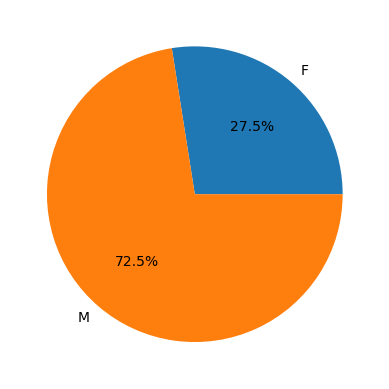

In [201]:
plt.pie(z['Sex'].groupby(z['Sex']).count(),labels=['F','M'],autopct='%1.1f%%')

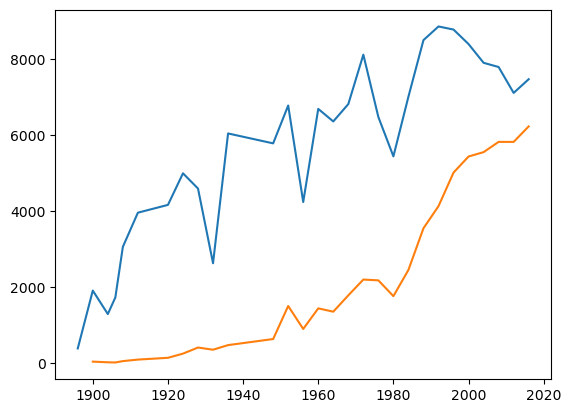

In [202]:
plt.plot(z['Year'][z['Season']=='Summer'][z['Sex']=='M'].unique(),z['Year'][z['Season']=='Summer'][z['Sex']=='M'].groupby(z['Year']).count())
plt.plot(z['Year'][z['Season']=='Summer'][z['Sex']=='F'].unique(),z['Year'][z['Season']=='Summer'][z['Sex']=='F'].groupby(z['Year']).count())

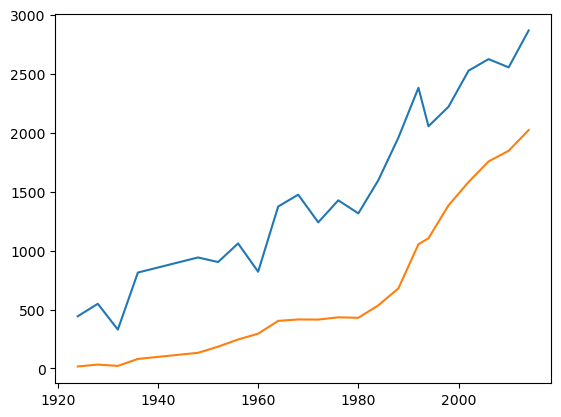

In [203]:
plt.plot(z['Year'][z['Season']=='Winter'][z['Sex']=='M'].unique(),z['Year'][z['Season']=='Winter'][z['Sex']=='M'].groupby(z['Year']).count())
plt.plot(z['Year'][z['Season']=='Winter'][z['Sex']=='F'].unique(),z['Year'][z['Season']=='Winter'][z['Sex']=='F'].groupby(z['Year']).count())

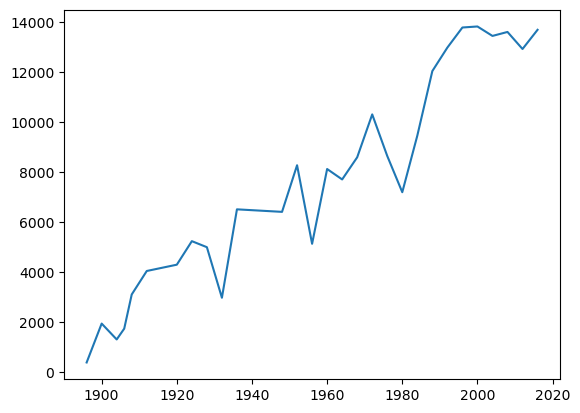

In [204]:
plt.plot(z['Year'][z['Season']=='Summer'].unique(),z['Year'][z['Season']=='Summer'].groupby(z['Year']).count())

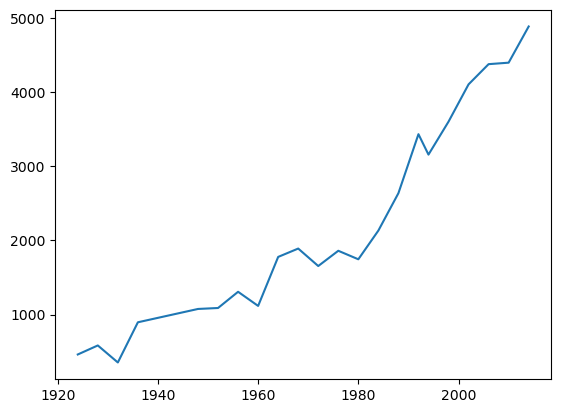

In [205]:
plt.plot(z['Year'][z['Season']=='Winter'].unique(),z['Year'][z['Season']=='Winter'].groupby(z['Year']).count())

__Total medals awarded in Olympics__

In [206]:
z['Medal'][z['Medal'].notnull()].groupby(z['Medal']).count().sort_values(ascending=False)

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

__10 Country which has won most medals in Olympics (medals won by all athletes)__

In [207]:
z[['Medal']][z['Medal'].notnull()].groupby(z['region']).count().sort_values(by='Medal',ascending=False).head(10)

,Medal
region,
USA,5637
Russia,3947
Germany,3756
UK,2068
France,1777
Italy,1637
Sweden,1536
Canada,1352
Australia,1349


__10 Most popular sports in Olympics__

In [208]:
z[['Sport']][z['Season']=='Summer'].value_counts().head(10)

Sport     
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Fencing       10735
Rowing        10595
Wrestling      7154
Football       6745
Sailing        6586
Name: count, dtype: int64

In [209]:
z[['Sport']][z['Season']=='Winter'].value_counts().head(10)

Sport                    
Cross Country Skiing         9133
Alpine Skiing                8829
Speed Skating                5613
Ice Hockey                   5456
Biathlon                     4893
Bobsleigh                    3058
Ski Jumping                  2401
Figure Skating               2244
Short Track Speed Skating    1534
Luge                         1479
Name: count, dtype: int64